# Использование вариационного метода.
Написание функций для быстрой работы с ним. Использование библиотеки.

In [1]:
import sys
sys.path.append("..")
import lib

In [2]:
import numpy as np
import lib.variational_method as variational
from lib.variational_method.variational import method

In [3]:
from lib.data import super_gauss
from lib.mesurements import mse

сетка $128 \times 128$

Проверим библиотеку

# Проверка библиотечных функций на квадратных изображениях. Написание функций для проверки.

In [4]:
def create_square_grid(M):
    """
    M - degree of grid
    """
    dim = 2 ** M * 1j
    return np.mgrid[-np.pi:np.pi:dim, -np.pi:np.pi:dim]

In [5]:
M = 7
h = 2 * np.pi / 2**M
x, y = create_square_grid(M)
front = x **2 + y ** 2

Пусть явные произовдные будут

In [6]:
g1, g2 = 2 * x, 2 * y
restored_front = method(g1, g2, h, h, 0.1, 0.002)

In [7]:
mse(front, restored_front)

3.2386844157722154

Большой mse. Плохо. Посмотрим что получили.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

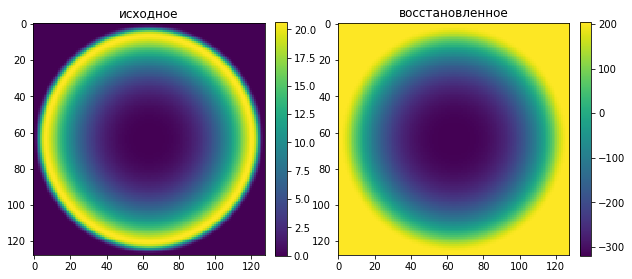

In [11]:
fig, axes = plt.subplots(1, 2, figsize = (10, 20))
img1 = axes[0].imshow(front)
img2 = axes[1].imshow(restored_front)
axes[0].set_title('исходное')
axes[1].set_title('восстановленное')
fig.colorbar(img1, ax = axes[0],fraction=0.046, pad=0.04)
fig.colorbar(img2, ax = axes[1],fraction=0.046, pad=0.04)

Вроде норм, давайте отнормируем и посчитаем mse

0.004182772928435895


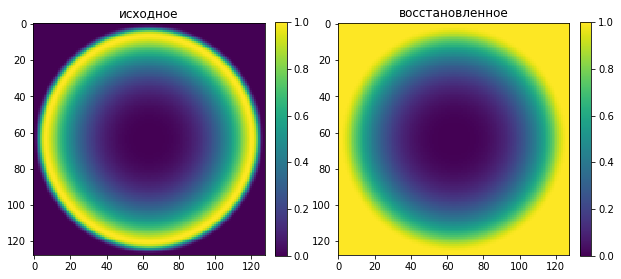

In [12]:
front -= front.min()
front /= front.max()
restored_front -= restored_front.min()
restored_front /= restored_front.max()
fig, axes = plt.subplots(1, 2, figsize = (10, 20))
img1 = axes[0].imshow(front)
img2 = axes[1].imshow(restored_front)
axes[0].set_title('исходное')
axes[1].set_title('восстановленное')
fig.colorbar(img1, ax = axes[0],fraction=0.046, pad=0.04)
fig.colorbar(img2, ax = axes[1],fraction=0.046, pad=0.04)
print(mse(front, restored_front))

Нормировка

In [13]:
def normilize(front):
    front -= front.min()
    front /= front.max()
    return front

Теперь посмотрим на других полиномах

0.00272210459742772


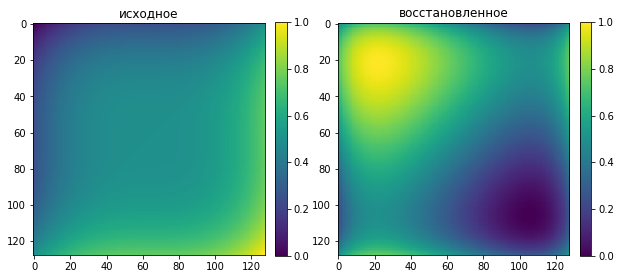

In [14]:
M = 7
h = 2 * np.pi / 2**M
x, y = create_square_grid(M)
front = x**3 + y**3
g1, g2 = 3 * x**2, 3 * y**2
restored_front = method(g1, g2, h, h, 2, 0.002)
front = normilize(front)
restored_front = normilize(restored_front)
print(mse(front, restored_front))
fig, axes = plt.subplots(1, 2, figsize = (10, 20))
img1 = axes[0].imshow(front)
img2 = axes[1].imshow(restored_front)
axes[0].set_title('исходное')
axes[1].set_title('восстановленное')
fig.colorbar(img1, ax = axes[0],fraction=0.046, pad=0.04)
fig.colorbar(img2, ax = axes[1],fraction=0.046, pad=0.04)

Как то плохо. Может умножить на супергаусс?

In [15]:
from lib.data import super_gauss

0.0034948901354356194


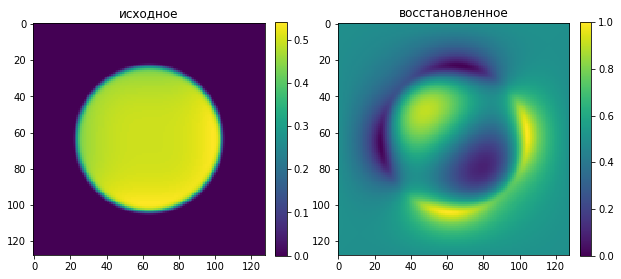

In [16]:
M = 7
h = 2 * np.pi / 2**M
x, y = create_square_grid(M)
gauss = super_gauss(x, y, 2, 20)
front = x**3 + y**3
g1, g2 = 3 * x**2, 3 * y**2
g1 *= gauss
g2 *= gauss
restored_front = method(g1, g2, h, h, 2, 0.002)
front = normilize(front) * gauss
restored_front = normilize(restored_front)
print(mse(front, restored_front))
fig, axes = plt.subplots(1, 2, figsize = (10, 20))
img1 = axes[0].imshow(front)
img2 = axes[1].imshow(restored_front)
axes[0].set_title('исходное')
axes[1].set_title('восстановленное')
fig.colorbar(img1, ax = axes[0],fraction=0.046, pad=0.04)
fig.colorbar(img2, ax = axes[1],fraction=0.046, pad=0.04)

Может другой полином попробовать?

0.0008108488298420575


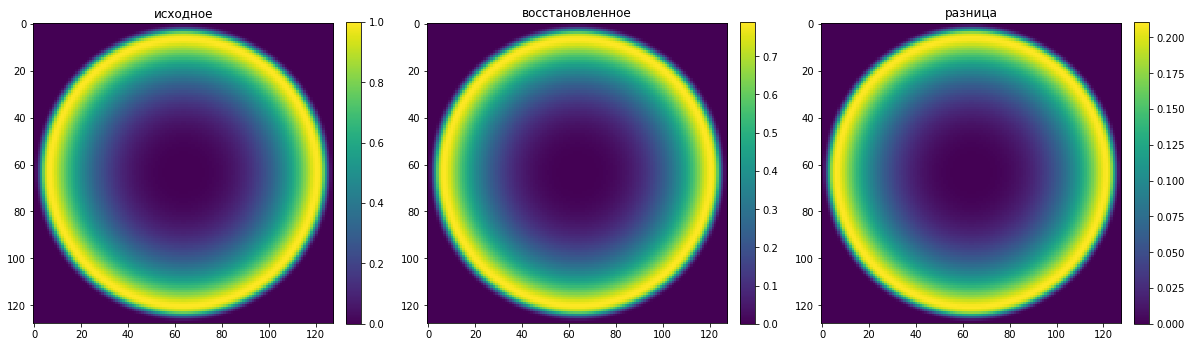

In [17]:
M = 7
h = 2 * np.pi / 2**M
x, y = create_square_grid(M)
gauss = super_gauss(x, y, 3, 20)
front = (x**2 + y**2)*np.sqrt(x**2 + y**2)
g1 = 2*x*np.sqrt(x**2 + y**2) + x**3/(np.sqrt(x**2 + y**2)) + x*y**2/np.sqrt(x**2 + y**2)
g2 = 2*y*np.sqrt(x**2 + y**2) + y**3/(np.sqrt(x**2 + y**2)) + y*x**2/np.sqrt(x**2 + y**2)

g1 *= gauss
g2 *= gauss
front *= gauss

restored_front = method(g1, g2, h, h, 0.002, 0.001)
front = normilize(front)
restored_front = normilize(restored_front) 
restored_front *= gauss
print(mse(front, restored_front))
fig, axes = plt.subplots(1, 3, figsize = (20, 40))
img1 = axes[0].imshow(front)
img2 = axes[1].imshow(restored_front)
img3 = axes[2].imshow(np.abs(restored_front -front))
axes[0].set_title('исходное')
axes[1].set_title('восстановленное')
axes[2].set_title('разница')
fig.colorbar(img1, ax = axes[0],fraction=0.046, pad=0.04)
fig.colorbar(img2, ax = axes[1],fraction=0.046, pad=0.04)
fig.colorbar(img3, ax = axes[2],fraction=0.046, pad=0.04)

Цернике работает, а не Цернике уже не работает. Хм...

0.00017446905952661957


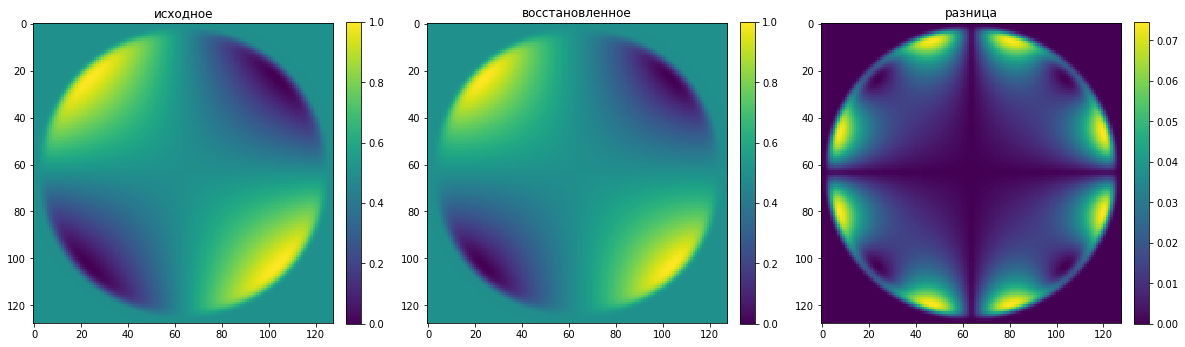

In [36]:
M = 7
h = 2 * np.pi / 2**M
x, y = create_square_grid(M)
gauss = super_gauss(x, y, 3, 20)
front = x * y
g1 = y
g2 = x

g1 *= gauss
g2 *= gauss
front *= gauss

restored_front = method(g1, g2, h, h, 0.002, 0.001)
front = normilize(front)

restored_front *= gauss
restored_front = normilize(restored_front)
print(mse(front, restored_front))
fig, axes = plt.subplots(1, 3, figsize = (20, 40))
img1 = axes[0].imshow(front)
img2 = axes[1].imshow(restored_front)
img3 = axes[2].imshow(np.abs(restored_front -front))
axes[0].set_title('исходное')
axes[1].set_title('восстановленное')
axes[2].set_title('разница')
fig.colorbar(img1, ax = axes[0],fraction=0.046, pad=0.04)
fig.colorbar(img2, ax = axes[1],fraction=0.046, pad=0.04)
fig.colorbar(img3, ax = axes[2],fraction=0.046, pad=0.04)

Сначала на Гуасс , а потом уже нормируем

0.0002803390071323925


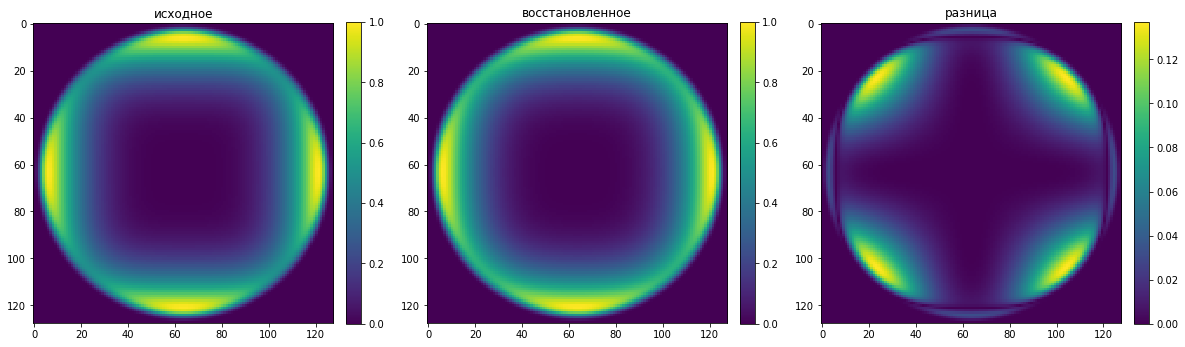

In [37]:
M = 7
h = 2 * np.pi / 2**M
x, y = create_square_grid(M)
gauss = super_gauss(x, y, 3, 20)
front = x**4 + y**4
g1 = 3 * x**3
g2 = 3 * y**3

g1 *= gauss
g2 *= gauss
front = normilize(front)
front *= gauss
front = normilize(front)
restored_front = method(g1, g2, h, h, 0.002, 0.001)

restored_front = normilize(restored_front)
restored_front *= gauss
restored_front = normilize(restored_front)

print(mse(front, restored_front))
fig, axes = plt.subplots(1, 3, figsize = (20, 40))
img1 = axes[0].imshow(front)
img2 = axes[1].imshow(restored_front)
img3 = axes[2].imshow(np.abs(restored_front -front))
axes[0].set_title('исходное')
axes[1].set_title('восстановленное')
axes[2].set_title('разница')
fig.colorbar(img1, ax = axes[0],fraction=0.046, pad=0.04)
fig.colorbar(img2, ax = axes[1],fraction=0.046, pad=0.04)
fig.colorbar(img3, ax = axes[2],fraction=0.046, pad=0.04)

Нормировка , Гаусс, Нормировка

Посмотрим разницу на $x^2 + y^2$

3.1796459135005045e-05


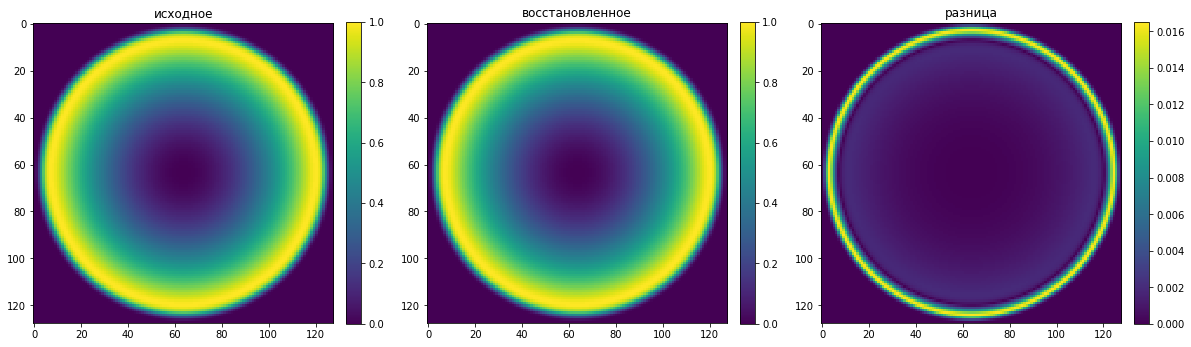

In [38]:
M = 7
h = 2 * np.pi / 2**M
x, y = create_square_grid(M)
gauss = super_gauss(x, y, 3, 20)
front = x**2 + y**2
g1 = 2 * x
g2 = 2 * y

g1 *= gauss
g2 *= gauss
front = normilize(front)
front *= gauss
front = normilize(front)
restored_front = method(g1, g2, h, h, 0.002, 0.001)

restored_front = normilize(restored_front)
restored_front *= gauss
restored_front = normilize(restored_front)

print(mse(front, restored_front))
fig, axes = plt.subplots(1, 3, figsize = (20, 40))
img1 = axes[0].imshow(front)
img2 = axes[1].imshow(restored_front)
img3 = axes[2].imshow(np.abs(restored_front -front))
axes[0].set_title('исходное')
axes[1].set_title('восстановленное')
axes[2].set_title('разница')
fig.colorbar(img1, ax = axes[0],fraction=0.046, pad=0.04)
fig.colorbar(img2, ax = axes[1],fraction=0.046, pad=0.04)
fig.colorbar(img3, ax = axes[2],fraction=0.046, pad=0.04)

А если не цернике теперь?

0.0017539452473710382


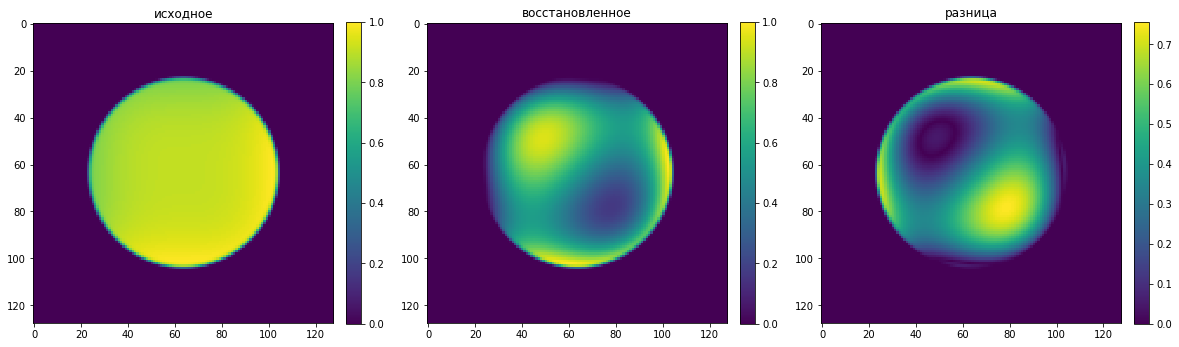

In [61]:
M = 7
h = 2 * np.pi / 2**M
x, y = create_square_grid(M)
gauss = super_gauss(x, y, 2, 40)
front = x**3 + y**3
g1 = 3 * x**2
g2 = 3 * y**2

g1 *= gauss
g2 *= gauss
front = normilize(front)
front *= gauss
front = normilize(front)

restored_front = method(g1, g2, h, h, 0.0002, 0.001)

restored_front = normilize(restored_front)
restored_front *= gauss
restored_front = normilize(restored_front)

print(mse(front, restored_front))
fig, axes = plt.subplots(1, 3, figsize = (20, 40))
img1 = axes[0].imshow(front)
img2 = axes[1].imshow(restored_front)
img3 = axes[2].imshow(np.abs(restored_front -front))
axes[0].set_title('исходное')
axes[1].set_title('восстановленное')
axes[2].set_title('разница')
fig.colorbar(img1, ax = axes[0],fraction=0.046, pad=0.04)
fig.colorbar(img2, ax = axes[1],fraction=0.046, pad=0.04)
fig.colorbar(img3, ax = axes[2],fraction=0.046, pad=0.04)

Плохо

Цернике высокого порядка теперь

5.0284869260094625e-05


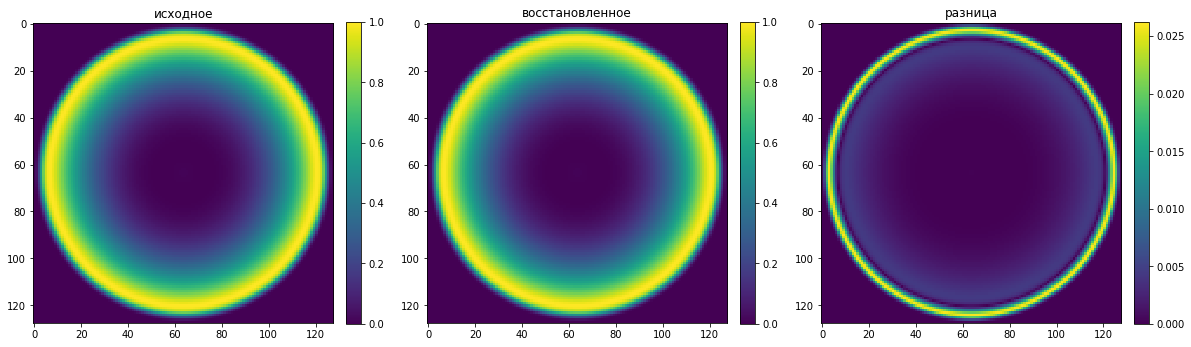

In [20]:
M = 7
h = 2 * np.pi / 2**M
x, y = create_square_grid(M)
gauss = super_gauss(x, y, 3, 20)
front = 3*(x**2 + y**2)*np.sqrt(x**2 + y**2) - 2*np.sqrt(x**2 + y**2)
g1 = (9*x**3 + 6*x*y**2 + 3*x*y**2 - 2*x)/np.sqrt(x**2 + y**2)
g2 = (9*y**3 + 6*y*x**2 + 3*x**2*y - 2*y)/np.sqrt(x**2 + y**2)

g1 *= gauss
g2 *= gauss
front = normilize(front)
front *= gauss
front = normilize(front)
restored_front = method(g1, g2, h, h, 0.002, 0.001)

restored_front = normilize(restored_front)
restored_front *= gauss
restored_front = normilize(restored_front)

print(mse(front, restored_front))
fig, axes = plt.subplots(1, 3, figsize = (20, 40))
img1 = axes[0].imshow(front)
img2 = axes[1].imshow(restored_front)
img3 = axes[2].imshow(np.abs(restored_front -front))
axes[0].set_title('исходное')
axes[1].set_title('восстановленное')
axes[2].set_title('разница')
fig.colorbar(img1, ax = axes[0],fraction=0.046, pad=0.04)
fig.colorbar(img2, ax = axes[1],fraction=0.046, pad=0.04)
fig.colorbar(img3, ax = axes[2],fraction=0.046, pad=0.04)


3.1796459135005045e-05


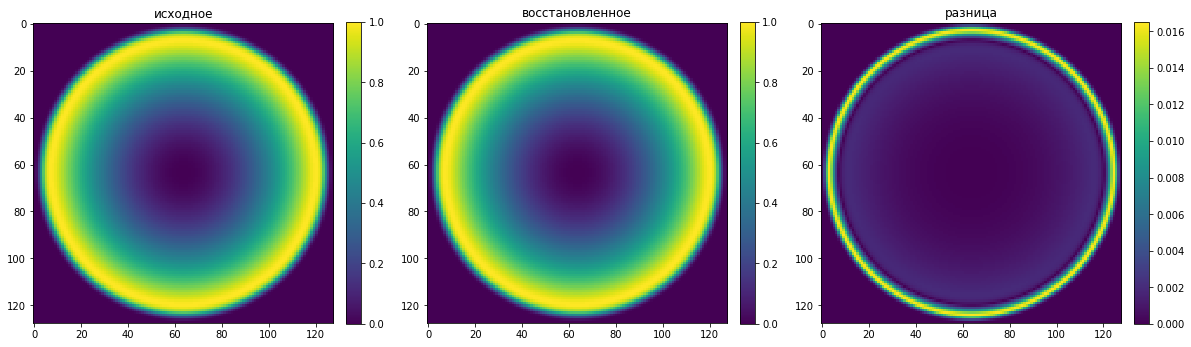

In [18]:
M = 7
h = 2 * np.pi / 2**M
x, y = create_square_grid(M)
gauss = super_gauss(x, y, 3, 20)
front = x**2 + y**2
g1 = 2 * x
g2 = 2 * y

g1 *= gauss
g2 *= gauss
front = normilize(front)
front *= gauss
front = normilize(front)
restored_front = method(g1, g2, h, h, 0.002, 0.001)

restored_front = normilize(restored_front)
restored_front *= gauss
restored_front = normilize(restored_front)

print(mse(front, restored_front))
fig, axes = plt.subplots(1, 3, figsize = (20, 40))
img1 = axes[0].imshow(front)
img2 = axes[1].imshow(restored_front)
img3 = axes[2].imshow(np.abs(restored_front -front))
axes[0].set_title('исходное')
axes[1].set_title('восстановленное')
axes[2].set_title('разница')
fig.colorbar(img1, ax = axes[0],fraction=0.046, pad=0.04)
fig.colorbar(img2, ax = axes[1],fraction=0.046, pad=0.04)
fig.colorbar(img3, ax = axes[2],fraction=0.046, pad=0.04)


# Итог:
1. Нормировка , Гаусс, Нормировка
2. Цернике восстанавливаются, $x^{2n + 1} + y^{2n+1}$ нет

1.2312444452446526e-05


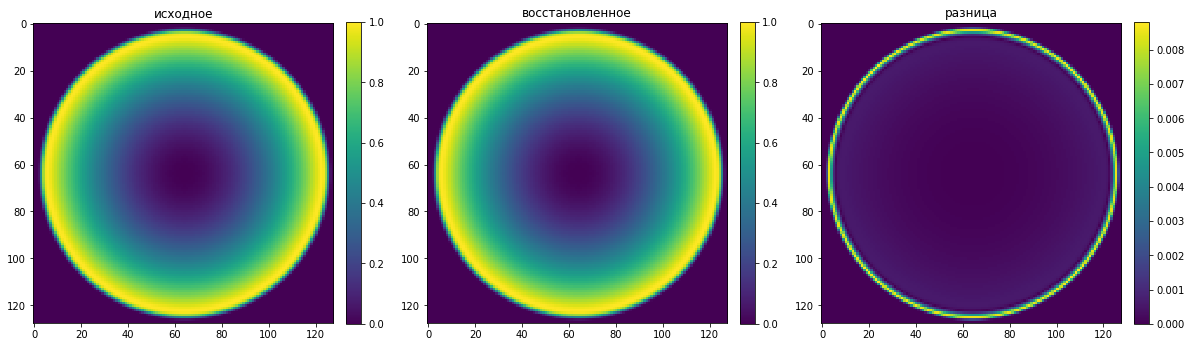

In [20]:
M = 7
h = 2 * np.pi / 2**M
x, y = np.mgrid[-np.pi:np.pi:h, -np.pi:np.pi:h]
h1 = x[1,0] - x[0,0]
h2 = y[0,1] - y[0,0]
gauss = super_gauss(x, y, 3, 40)
front = x**2 + y**2
g1 = 2 * x
g2 = 2 * y

g1 *= gauss
g2 *= gauss
front = normilize(front)
front *= gauss
front = normilize(front)

restored_front = method(g1, g2, h1, h2, 0.0002, 0.001)

restored_front = normilize(restored_front)
restored_front *= gauss
restored_front = normilize(restored_front)

print(mse(front, restored_front))
fig, axes = plt.subplots(1, 3, figsize = (20, 40))
img1 = axes[0].imshow(front)
img2 = axes[1].imshow(restored_front)
img3 = axes[2].imshow(np.abs(restored_front -front))
axes[0].set_title('исходное')
axes[1].set_title('восстановленное')
axes[2].set_title('разница')
fig.colorbar(img1, ax = axes[0],fraction=0.046, pad=0.04)
fig.colorbar(img2, ax = axes[1],fraction=0.046, pad=0.04)
fig.colorbar(img3, ax = axes[2],fraction=0.046, pad=0.04)

Так в 2 раза точнее